In [7]:
!pip install gym-super-mario-bros nes_py

In [1]:
#import game
import gym_super_mario_bros
#import joypad
from nes_py.wrappers import JoypadSpace
#Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
# Setup Game
env = gym_super_mario_bros.make("SuperMarioBros-v0")
env = JoypadSpace(env,SIMPLE_MOVEMENT)

In [5]:
done = True
for step in range(100000):
    if done:
        env.reset()
    state,reward,done,info = env.step(env.action_space.sample())
    env.render()
env.close()

2022-01-05 13:29:28.385 python[97152:4217964] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f79e4ccf3d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-05 13:29:28.386 python[97152:4217964] Warning: Expected min height of view: (<NSButton: 0x7f79e4ce54a0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-05 13:29:28.390 python[97152:4217964] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f79e4ce5960>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-05 13:29:28.392 python[97152:4217964] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f79e4ce83d0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


KeyboardInterrupt: 

In [17]:
#Install pytorch
!conda install pytorch torchvision torchaudio -c pytorch -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/nguyentruongduykhang/anaconda3/envs/MachineLearning

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    llvm-openmp-12.0.0         |       h0dcd299_1         262 KB
    openh264-2.1.1             |       h8346a28_0         655 KB
    pytorch-1.10.1             |          py3.9_0        97.9 MB  pytorch
    torchaudio-0.10.1          |         py39_cpu         4.0 MB  pytorch
    torchvision-0.11.2         |         py39_cpu         7.0 MB  pytorch
    typing_extensions-3.10.0.2 |     pyh06a4308_0          31 KB
    ---------------------------------------------

In [19]:
!pip install 'stable-baselines3[extra]'

     |████████████████████████████████| 174 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 45.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 21.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 70.7 MB/s eta 0:00:01
     |████████████████████████████████| 46.0 MB 65.4 MB/s eta 0:00:01    |██████▎                         | 9.1 MB 28.9 MB/s eta 0:00:02
     |████████████████████████████████| 238 kB 47.7 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 43.1 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 49.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 40.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 51.7 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 52.1 MB/s eta 0:00:01
     |███████████████████████████████

In [20]:
# Preprocess Environment

#Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation

#Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
#Import Matplotlib
from matplotlib import  pyplot as plt

In [32]:
# 1.Create the base environment 
env = gym_super_mario_bros.make("SuperMarioBros-v0")
# 2. Simplify the controls
env = JoypadSpace(env,SIMPLE_MOVEMENT)
# 3. GrayScale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy environment
env = DummyVecEnv([lambda:env])
# 5. Stack the frames
env = VecFrameStack(env,4,channels_order="last")

In [46]:
state = env.reset()

In [47]:
state.shape

(1, 240, 256, 4)

In [56]:
state,reward,done,info = env.step([5])

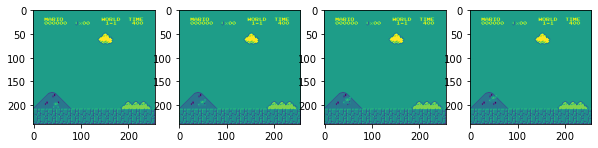

In [57]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [58]:
# Train the RL model

In [59]:
#Import OS for file path management
import os

#Import PPO for algos
from stable_baselines3 import PPO

#Import  Base Callback for saving models
from stable_baselines3.common.callbacks import  BaseCallback